In [2]:
#Load libraries
import pandas as pd 
import os 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats 
from scipy.stats import chi2_contingency
from sklearn.ensemble import RandomForestClassifier 
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange, uniform


In [3]:
#Set working directory
os.chdir("D:\Edwisor\project\Bike-Rental-Prediction-master")
os.getcwd()

#get the list of files in the  directy

print(os.listdir(os.getcwd()))

['.RData', '.Rhistory', 'atemp.png', 'box plot temp, casual uses, atempe.png', 'casual.png', 'casuers.png', 'corelation plot.png', 'count vs holiday.png', 'count vs holiday1.png', 'count vs month.png', 'count vs seaason.png', 'count vs weathersituation.png', 'count vs weekday.png', 'Count.png', 'DataN0103.pdf', 'day.csv', 'hist registed usr.png', 'histogram casul users.png', 'hum and temp.png', 'humi and wind.png', 'humi.png', 'missing values.PNG', 'Mongo DB.ipynb', 'QQ casual users.png', 'qq registerd usr.png', 'regi.png', 'registd userrs, ,count.png', 'Rplot.png', 'Rplot01.png', 'Rplot02.png', 'Rplot03.png', 'Rplot04.png', 'Rplot05.png', 'rregistered users cunt.png', 'sample-report.pdf', 'temp and a temp.png', 'temp, casual, atemep.png', 'temp.png', 'weathsit vs count.png', 'windspeed vs temperaturre.png', 'winspd.png']


In [4]:
#Load data
df_data = pd.read_csv("day.csv")

In [5]:
#Print the `head` of the data
df_data.head()

# change the names of the columns
#Rename varaible
df_data = df_data.rename(columns = {'instant':'Index', 'dteday':'Date','season':'Season','yr':'Year','mnth':'Month','weekday':'Weekday','workingday':'Working Day','weathersit':'WeatherSituation','temp':'Temperature','atemp':'Atemperature','hum':'Humidity','windspeed':'Windspeed','casual':'CasualUsers','registered':'RegisteredUsers','cnt':'Count'})

df_data.columns

Index(['Index', 'Date', 'Season', 'Year', 'Month', 'holiday', 'Weekday',
       'Working Day', 'WeatherSituation', 'Temperature', 'Atemperature',
       'Humidity', 'Windspeed', 'CasualUsers', 'RegisteredUsers', 'Count'],
      dtype='object')

In [6]:
#understanding of data
df_data.shape
#It contains (731, 16)

df_data.describe()

df_data.info()

#data  consist of Integers , Float  and Object(categorical) variables 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
Index               731 non-null int64
Date                731 non-null object
Season              731 non-null int64
Year                731 non-null int64
Month               731 non-null int64
holiday             731 non-null int64
Weekday             731 non-null int64
Working Day         731 non-null int64
WeatherSituation    731 non-null int64
Temperature         731 non-null float64
Atemperature        731 non-null float64
Humidity            731 non-null float64
Windspeed           731 non-null float64
CasualUsers         731 non-null int64
RegisteredUsers     731 non-null int64
Count               731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 88.6+ KB


C:\Users\annu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


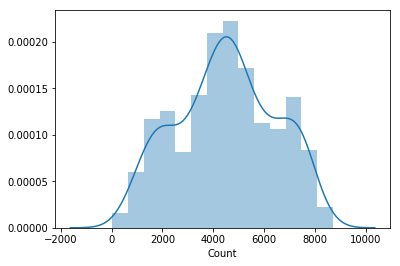

In [7]:
##################################################### Univariate Analysis##########################################
# Target variable  analysis


#Check whether target variable is normal or not
sns.distplot(df_data['Count'])
# it is norrmally distributed.




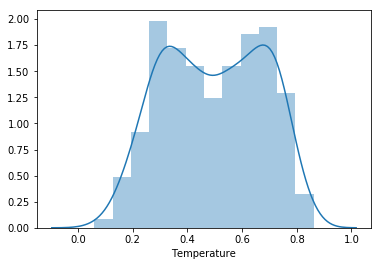

In [8]:
### Check weather the independent variables arre normall distributed or not.

#Check whether  variable 'Temperature' is normal or not
sns.distplot(df_data['Temperature']);

# it is nearly norrmally distributed.

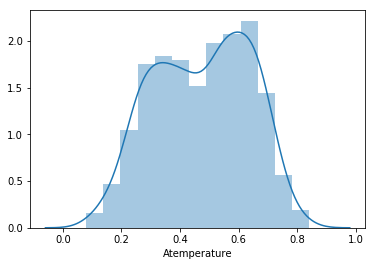

In [9]:
#Check whether  variable 'Atemperature'is normal or not
sns.distplot(df_data['Atemperature']);

# it is nearly norrmally distributed.

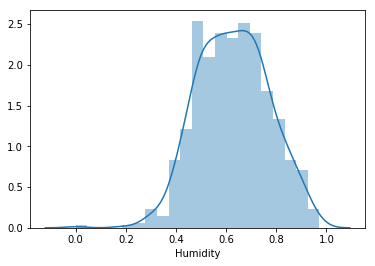

In [10]:

#Check whether  variable 'Humidity'is normal or not
sns.distplot(df_data['Humidity']);

# little skewed to the right

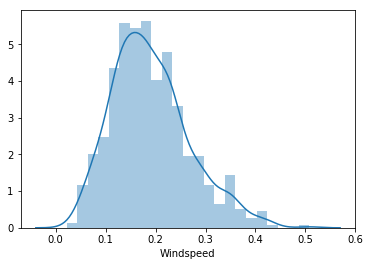

In [11]:
#Check whether  variable 'windspeed'is normal or not
sns.distplot(df_data['Windspeed']);

# it is nearly norrmally distributed.

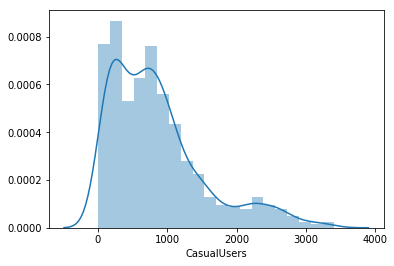

In [12]:
#Check whether  variable 'CasualUsers'is normal or not
sns.distplot(df_data['CasualUsers']);

# it is skewed to the left; outliers may be present.


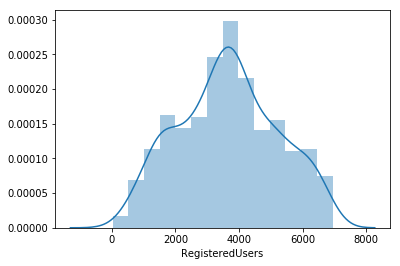

In [13]:
#Check whether  variable 'registered'is normal or not
sns.distplot(df_data['RegisteredUsers']);

# it is normally distributed.

In [14]:
print("Skewness: %f" % df_data['Count'].skew())
print("Kurtosis: %f" % df_data['Count'].kurt())

##skewnesss and kurtosis values are less therefore we can say that the Count is normally distributed.

Skewness: -0.047353
Kurtosis: -0.811922


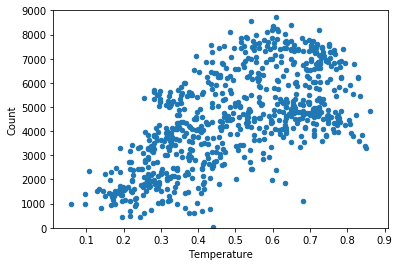

In [15]:
#############Bivariate  Relationship ############


df_data['Temperature'].value_counts()

#Now draw scatter plot between 'Temperature' and 'Count' variables

data = pd.concat([df_data['Count'], df_data['Temperature']], axis=1)
data.plot.scatter(x='Temperature', y='Count', ylim=(0,9000));

# It is showing  there is good relation between 'temperature' and 'count'


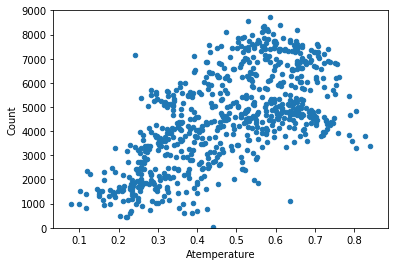

In [16]:
#Now draw scatter plot between 'Atemperature' and 'Count' variables

var = 'Atemperature'
data = pd.concat([df_data['Count'], df_data[var]], axis=1)
data.plot.scatter(x=var, y='Count', ylim=(0,9000));

# this also shows the similar realtion with count as shown by Temperature.

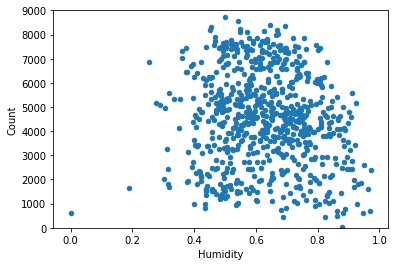

In [17]:
#Now draw scatter plot between 'Humidity' and 'Count' variables

data = pd.concat([df_data['Count'], df_data['Humidity']], axis=1)
data.plot.scatter(x='Humidity', y='Count', ylim=(0,9000));


# it shows that both are not actully dependent on each other.

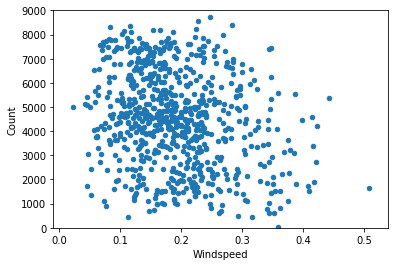

In [18]:
#relation between Numerical Variable 'windspeed' and target variable 'count'

data = pd.concat([df_data['Count'], df_data['Windspeed']], axis=1)
data.plot.scatter(x='Windspeed', y='Count', ylim=(0,9000));

# it shows veryy low and -ve correlation with each other.

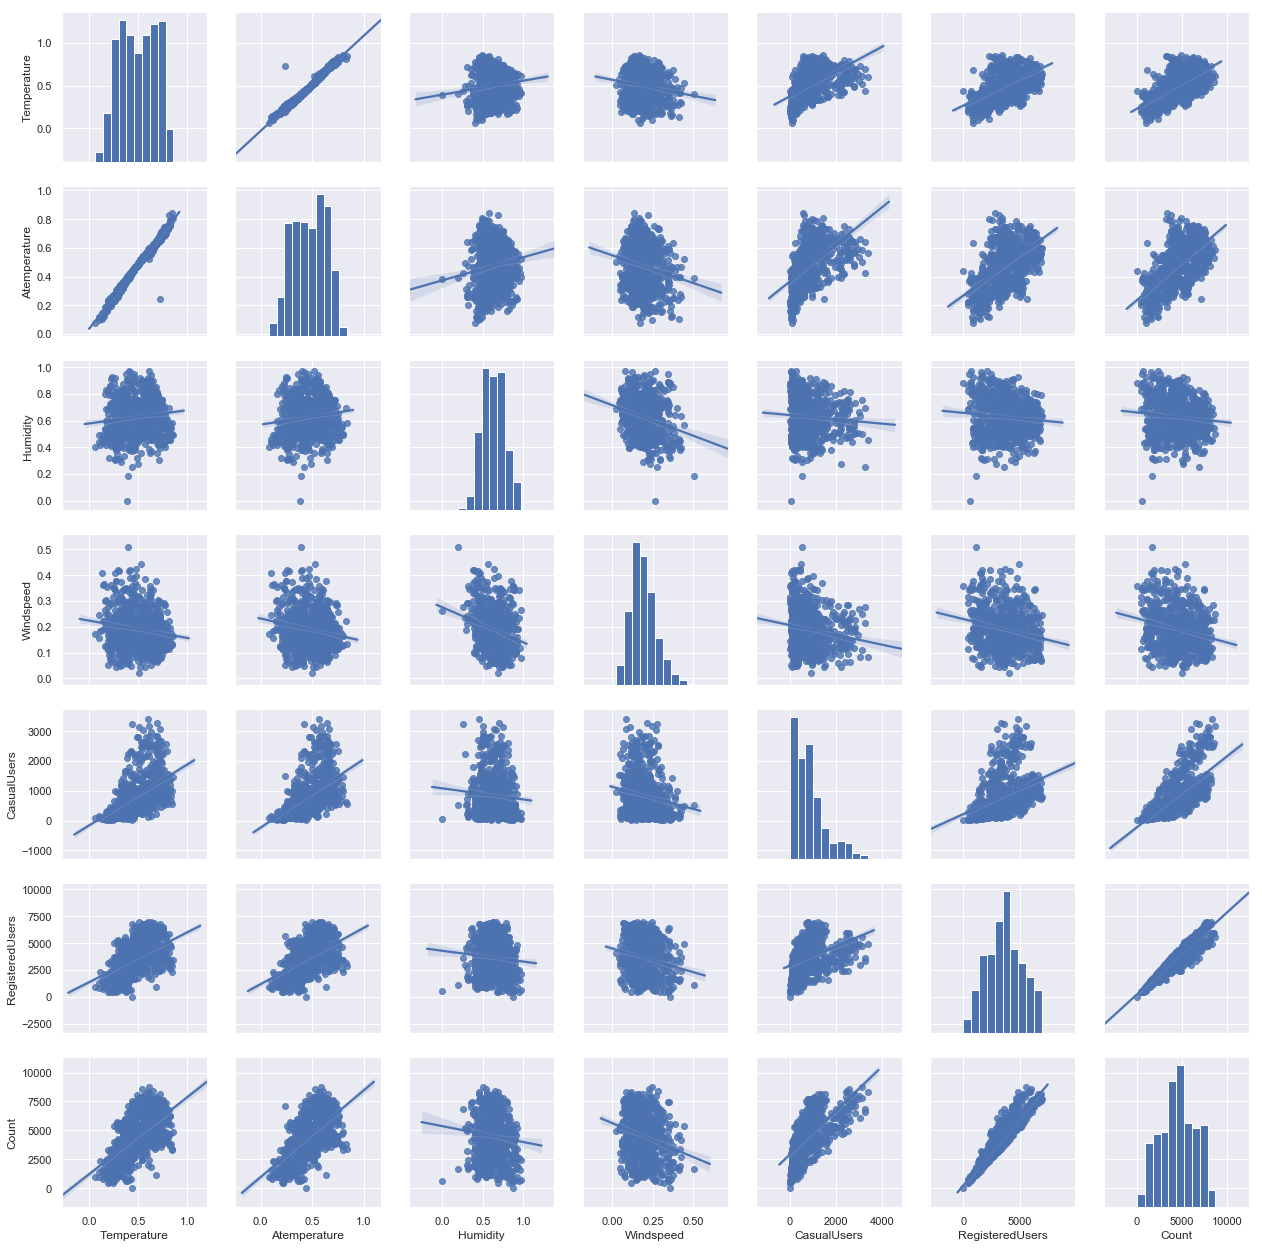

In [20]:
# check relationship with scatter plots

sns.set()
cols = ['Temperature','Atemperature','Humidity','Windspeed','CasualUsers','RegisteredUsers','Count']
sns.pairplot(df_data[cols], height = 2.5,kind="reg")
plt.show();

# MISSING VALUE ANALYSIS

In [21]:


#Create dataframe with missing percentage
missing_val = pd.DataFrame(df_data.isnull().sum())

#Reset index
missing_val = missing_val.reset_index()

#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(df_data))*100

## no missing values prresnt so no need for missing value analysis.



## OUTLIER ANALYSIS

CasualUsers
-855.25
2266.75
RegisteredUsers
-922.25
8195.75


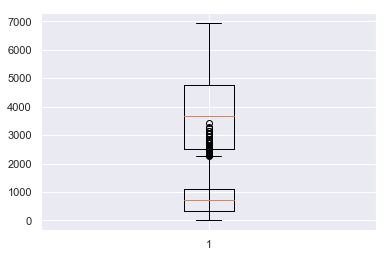

In [24]:


#Since Temperature, Atemperature, Windspeed and Humidity are already normalized so need of outlier analysis on these variables.
# We need to conduct Outlier analsis only on Casual Users and Registered users.


#box plot for Casual users and Registered users

plt.boxplot(df_data['CasualUsers'])

plt.boxplot(df_data['RegisteredUsers'])

# we can see some outliers with both the data sets.
#we will eliminate the outliers 

cnames =  ["CasualUsers", "RegisteredUsers"]
# Detect and delete outliers from data
for i in cnames:
    print(i)
    q75, q25 = np.percentile(df_data.loc[:,i], [75 ,25])
    iqr = q75 - q25

    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print(min)
    print(max)
    
    df_data_1 = df_data.drop(df_data[df_data.loc[:,i] < min].index)
    df_data_1 = df_data.drop(df_data[df_data.loc[:,i] > max].index)
    
    
 

{'whiskers': [<matplotlib.lines.Line2D at 0xafa3a10>,
 'caps': [<matplotlib.lines.Line2D at 0xafab050>,
 'boxes': [<matplotlib.lines.Line2D at 0xafa3b30>],
 'medians': [<matplotlib.lines.Line2D at 0xafab510>],
 'fliers': [<matplotlib.lines.Line2D at 0xafab770>],
 'means': []}

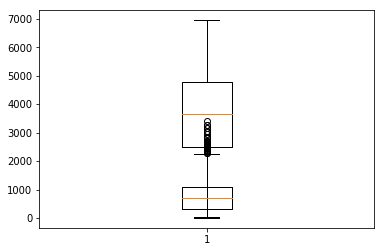

In [13]:
#Boxplot for casualUsers and Registered Users after  outlier removal

plt.boxplot(df_data_1['CasualUsers'])

plt.boxplot(df_data['RegisteredUsers'])

## FEATURE SELECTION

In [14]:
##Correlation analysis
#Correlation plot

df_corr = df_data.loc[:,['Temperature','Atemperature','Humidity','Windspeed','CasualUsers','RegisteredUsers','Count']]
df_corr.shape


#draw  correlation matrix between all  numeric variables and analyse  what are the variables are important

df_corr.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)


#As per Correlation matrix there is strong relation 
# Independent variable   'Temperature' and 'Atemperature'
# There is a   poor relation between  Independent variable 'Humidity' and dependent  variable 'Count'

# so dropping two variables for feature scaling

numeric_features = df_corr.loc[:,['Temperature','Windspeed','CasualUsers','RegisteredUsers','Count']]
numeric_features

,Temperature,Windspeed,CasualUsers,RegisteredUsers,Count
0,0.344167,0.160446,331,654,985
1,0.363478,0.248539,131,670,801
2,0.196364,0.248309,120,1229,1349
3,0.200000,0.160296,108,1454,1562
4,0.226957,0.186900,82,1518,1600
5,0.204348,0.089565,88,1518,1606
6,0.196522,0.168726,148,1362,1510
7,0.165000,0.266804,68,891,959
8,0.138333,0.361950,54,768,822
9,0.150833,0.223267,41,1280,1321


# FEATURE SCALING

In [ ]:
#######################################  Normality  Check ######################################
 # CasualUsers and RegisteredUsers only because other continuous variables are normalised.

cnames = ['CasualUsers','RegisteredUsers']

for i in cnames :
     print(i)
    df_data[i] = ((df_data[i] - min(df_data[i]))/(max(df_data[i]) - min(df_data[i]))

df_data


# MODEL DEVELOPMENT

In [18]:
###############DECISION TREE###############
#Import Libraries for decision tree
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [16]:
#dividing  Test and train data  using skilearn   train_test_split 

train, test = train_test_split(numeric_features, test_size=0.2)

train.shape




(584, 5)

In [33]:
#Decision tree for regression
fit_DT = DecisionTreeRegressor(max_depth=2).fit(train.iloc[:,0:4], train.iloc[:,4])

#Apply model on test data
predictions_DT = fit_DT.predict(test.iloc[:,0:4])

predictions_DT


array([4679.69032258, 3629.20833333, 6586.02040816, 4679.69032258,
       1682.22123894, 3629.20833333, 4679.69032258, 1682.22123894,
       1682.22123894, 3629.20833333, 3629.20833333, 6586.02040816,
       6586.02040816, 4679.69032258, 3629.20833333, 3629.20833333,
       1682.22123894, 4679.69032258, 3629.20833333, 6586.02040816,
       1682.22123894, 4679.69032258, 6586.02040816, 6586.02040816,
       1682.22123894, 3629.20833333, 1682.22123894, 4679.69032258,
       1682.22123894, 3629.20833333, 6586.02040816, 6586.02040816,
       4679.69032258, 1682.22123894, 6586.02040816, 6586.02040816,
       1682.22123894, 6586.02040816, 4679.69032258, 4679.69032258,
       6586.02040816, 4679.69032258, 1682.22123894, 4679.69032258,
       6586.02040816, 6586.02040816, 6586.02040816, 4679.69032258,
       4679.69032258, 6586.02040816, 1682.22123894, 1682.22123894,
       3629.20833333, 4679.69032258, 6586.02040816, 4679.69032258,
       1682.22123894, 6586.02040816, 6586.02040816, 4679.69032

In [36]:
#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape
MAPE(test.iloc[:,4], predictions_DT)

##Mape= 17.790592011516313%



Mean Square :  554902.842944801
Root Mean Square :  744.9180108876419


744.9180108876419

In [37]:
# Calculate RMSE
def RMSE(y_test,y_predict):
    mse = np.mean((y_test-y_predict)**2)
    print("Mean Square : ",mse)
    rmse=np.sqrt(mse)
    print("Root Mean Square : ",rmse)
    return rmse
RMSE(test.iloc[:,4], predictions_DT)

##Root Mean Square :  744.9180108876419

Mean Square :  554902.842944801
Root Mean Square :  744.9180108876419


744.9180108876419

In [34]:
################# RANDOM FOREST ################
from sklearn.ensemble import RandomForestRegressor

# Randon forest for Regression
RF_model_one = RandomForestRegressor(n_estimators= 500, random_state=100).fit(train.iloc[:,0:4], train.iloc[:,4])

# Predict the model using predict funtion

RF_predict_one= RF_model_one.predict(test.iloc[:,0:4])
RF_predict_one


array([4337.614, 4296.92 , 5042.276, 3616.578, 1408.666, 3030.286,
       4776.366, 1363.332, 2394.692, 4985.884, 4275.924, 7634.08 ,
       7425.452, 4597.6  , 4000.758, 2749.502, 1952.198, 5332.678,
       3881.616, 5458.186, 1806.576, 4132.486, 7595.996, 6028.586,
       1854.436, 3163.984,  782.632, 3674.402, 2070.602, 4948.066,
       7905.17 , 6906.074, 4920.016, 2336.318, 6323.558, 6755.254,
       2350.68 , 7453.722, 4255.146, 4561.686, 7378.486, 5142.632,
       2019.572, 4715.394, 7232.712, 6404.236, 6317.682, 4155.658,
       4640.192, 7465.518, 1391.022,  651.948, 3503.006, 4384.61 ,
       6861.72 , 4416.962, 1875.528, 7503.492, 5815.1  , 4343.306,
       7560.898, 5321.634, 3392.244, 5827.804, 5012.6  , 3936.536,
       7414.81 , 7633.684, 4708.256, 5878.61 , 7357.59 , 4197.544,
       7522.998, 5559.614, 2717.75 , 4369.894, 4092.174, 4351.496,
       1990.972, 1547.52 , 4525.132, 2405.732, 5065.54 , 5054.49 ,
       5271.498, 5473.54 , 5289.04 , 3878.43 , 6750.338, 4030.

In [38]:
#Evaluate Random forest using  MAPE 

MAPE(test.iloc[:,4],RF_predict_one)

#MAPE=1.591%

# Calculation of RMSE
RMSE(test.iloc[:,4], RF_predict_one)
##Root Mean Square :  85.2030290731386

Mean Square :  7259.556163238101
Root Mean Square :  85.2030290731386


85.2030290731386

In [49]:
############## LINEAR REGRESSION ##############

#import  linear regression  

import statsmodels.api as sm

# Train the model using the training sets
model = sm.OLS(train.iloc[:,4], train.iloc[:,0:4]).fit()

# Print out the statistics
model.summary()

# make the predictions by the model
predictions_LR = model.predict(test.iloc[:,0:4])

predictions_LR

In [51]:
#Evaluate Linear Regession using  MAPE 

MAPE(test.iloc[:,4],predictions_LR)
#MAPE =3.4221168379447046e-14

# Calculation of RMSE
RMSE(test.iloc[:,4], predictions_LR)
##Root Mean Square : 1.262973099246111e-12 

Mean Square :  1.595101049419327e-24
Root Mean Square :  1.262973099246111e-12


1.262973099246111e-12

In [57]:
###########KNN REGRESSION######################

from sklearn.neighbors import KNeighborsRegressor

#Train the model using the training sets
KNN_model = KNeighborsRegressor(n_neighbors=2).fit(train.iloc[:,0:4], train.iloc[:,4])

# Predict the model using predict funtion

KNN_predict= KNN_model.predict(test.iloc[:,0:4])
KNN_predict

array([4401.5, 4325.5, 5044. , 3587.5, 1418.5, 2934. , 5003. , 1282. ,
       2410. , 4908.5, 4298. , 7712. , 7394.5, 4643.5, 3967.5, 2580. ,
       1928.5, 5253.5, 3802.5, 5544.5, 1729. , 4113. , 7518. , 5764.5,
       1853.5, 3216.5,  753. , 3658.5, 2045.5, 4963.5, 7887. , 6956.5,
       4973. , 2421. , 6215. , 6871.5, 2339.5, 7443.5, 4285. , 4535. ,
       7402.5, 5012.5, 1928.5, 4703. , 7137. , 6764. , 6413.5, 4179.5,
       4643.5, 7475. , 1282. ,  664. , 3469.5, 4337.5, 6961. , 4395. ,
       1853.5, 7482.5, 5872.5, 4302. , 7463.5, 5218.5, 3262. , 5707.5,
       5064.5, 3899.5, 7507.5, 7644.5, 4700. , 5872.5, 7335. , 4113. ,
       7593.5, 5409. , 2761.5, 4395. , 4048. , 4352. , 1956.5, 1536. ,
       4583. , 2410. , 5213.5, 5044. , 5239. , 5409. , 5239. , 3847.5,
       6838. , 3957.5, 1004. , 2016.5, 3377.5, 4507. , 6845.5, 4352. ,
       4824.5, 6874. , 7900.5, 4114. , 8088. , 5626. , 3738.5, 5303.5,
       3744. , 7240. ,  664. , 4582.5, 1947. , 6597.5, 5303.5, 2209.5,
      

In [59]:
#Evaluate KNN Regression using  MAPE 

MAPE(test.iloc[:,4],KNN_predict)
#MAPE =1.510761696929222

# Calculation of RMSE
RMSE(test.iloc[:,4], KNN_predict)
##Root Mean Square :79.13457280004043

Mean Square :  6262.280612244898
Root Mean Square :  79.13457280004043


79.13457280004043

## Therefore on comparing the  values of MAPE and RMSE we can say that Linear regression is the  best model for the dataset